# ДЗ №2

In [1]:
import numpy as np

import keras
from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# from silence_tensorflow import silence_tensorflow
# silence_tensorflow()

## Исходный вариант сети

1. Получение данных

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
print(train_images.shape)
train_images[:2]

(60000, 28, 28)


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

2. Обработка данных

In [5]:
# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

print(train_images.shape)
train_images[:2]

(60000, 28, 28)


array([[[-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
        [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
        [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
        ...,
        [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
        [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
        [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5]],

       [[-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
        [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
        [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
        ...,
        [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
        [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
        [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5]]])

In [6]:
# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)
train_images[:2]

(60000, 784)
(10000, 784)


array([[-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
       [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5]])

3. Архитектура сети

In [7]:
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

4. Компиляция модели

In [8]:
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

5. Обучение модели

In [9]:
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=32,
)

Epoch 1/5
60000/60000 [==============================] - 12s 201us/step - loss: 0.3684 - accuracy: 0.8897
Epoch 2/5
60000/60000 [==============================] - 13s 222us/step - loss: 0.1930 - accuracy: 0.9409
Epoch 3/5
60000/60000 [==============================] - 12s 192us/step - loss: 0.1485 - accuracy: 0.9549
Epoch 4/5
60000/60000 [==============================] - 11s 188us/step - loss: 0.1254 - accuracy: 0.9614
Epoch 5/5
60000/60000 [==============================] - 11s 182us/step - loss: 0.1085 - accuracy: 0.9659


In [10]:
to_categorical(train_labels)

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

6. Оценка обучения

In [11]:
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

10000/10000 [==============================] - 1s 82us/step


[0.11076618862506002, 0.9639000296592712]

In [12]:
model.metrics_names

['loss', 'accuracy']

7. Сохранение обученной модели

In [13]:
model.save_weights('model.h5')

In [14]:
# Load the model from disk later using:
# model.load_weights('model.h5')

8. Применение на первых 10 изображениях

In [15]:
predictions_10 = model.predict(test_images[:10])
print(np.argmax(predictions_10, axis=1))

[7 2 1 0 4 1 4 9 5 9]


Сравнение с проверочными метками

In [16]:
print(test_labels[:10])

[7 2 1 0 4 1 4 9 5 9]


In [17]:
predictions = model.predict(test_images)
predictions = np.argmax(predictions, axis=1)
print(f"accuracy_score test:\t{accuracy_score(test_labels, predictions):.3f}\n\n")

accuracy_score test:	0.964




## Подбор параметров

In [18]:
# нужны глобальные: train_images, train_labels, test_images, test_labels
def build_eval_nn(ep_n = 5, b_s = 32, n_num = 64, add_layer = False, vr = 1):
    if (add_layer):
        model = Sequential([Dense(n_num, activation='relu', input_shape=(784,)),
                            Dense(n_num, activation='relu'),
                            Dense(n_num, activation='relu'),
                            Dense(10, activation='softmax')])
    else:
        model = Sequential([Dense(n_num, activation='relu', input_shape=(784,)),
                            Dense(n_num, activation='relu'),
                            Dense(10, activation='softmax')])
    
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    fit_data = model.fit(train_images,
                         to_categorical(train_labels),
                         epochs = ep_n,
                         batch_size = b_s, 
                         verbose = vr)
    
    model_loss, model_accuracy = model.evaluate(test_images,
                                                to_categorical(test_labels), 
                                                verbose = 0)
    return model_loss, model_accuracy, fit_data

### Профиль loss и accuracy на train данных (модель 2 скрытых слоя)

In [19]:
model_loss, model_accuracy, fit_data = build_eval_nn(ep_n = 25)
fit_data.history

Epoch 1/25
60000/60000 [==============================] - 11s 188us/step - loss: 0.3494 - accuracy: 0.8945
Epoch 2/25
60000/60000 [==============================] - 14s 240us/step - loss: 0.1791 - accuracy: 0.9455
Epoch 3/25
60000/60000 [==============================] - 11s 190us/step - loss: 0.1372 - accuracy: 0.9574
Epoch 4/25
60000/60000 [==============================] - 11s 189us/step - loss: 0.1171 - accuracy: 0.9639
Epoch 5/25
60000/60000 [==============================] - 11s 181us/step - loss: 0.1008 - accuracy: 0.9692
Epoch 6/25
60000/60000 [==============================] - 12s 195us/step - loss: 0.0884 - accuracy: 0.9725
Epoch 7/25
60000/60000 [==============================] - 14s 241us/step - loss: 0.0815 - accuracy: 0.9739
Epoch 8/25
60000/60000 [==============================] - 11s 181us/step - loss: 0.0733 - accuracy: 0.9769
Epoch 9/25
60000/60000 [==============================] - 11s 184us/step - loss: 0.0672 - accuracy: 0.9783
Epoch 10/25
60000/60000 [============

{'loss': [0.34942892563839756,
  0.17907779497603576,
  0.13723921462967992,
  0.11705728246110181,
  0.10076716980505734,
  0.08838944189772009,
  0.08145734127853066,
  0.07330886687804014,
  0.06723528762647572,
  0.06029914705085879,
  0.05843973120677595,
  0.05337106564866068,
  0.04999089468833991,
  0.046263020481254594,
  0.04301913702932652,
  0.04100989620284236,
  0.038766521203397616,
  0.03804585529564259,
  0.036240051328006666,
  0.03440092723728449,
  0.03303292919107189,
  0.031523290334957224,
  0.030664103623188565,
  0.03117710357484951,
  0.026654738363420378],
 'accuracy': [0.8945,
  0.94551665,
  0.95743334,
  0.96395,
  0.96915,
  0.97245,
  0.97391665,
  0.97695,
  0.97826666,
  0.9806333,
  0.98046666,
  0.98296666,
  0.98315,
  0.98438334,
  0.9855833,
  0.986,
  0.9871,
  0.98768336,
  0.9877,
  0.98803335,
  0.98911667,
  0.9892833,
  0.9893,
  0.98945,
  0.99093336]}

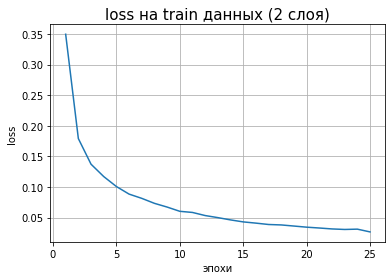

In [20]:
plt.plot(np.arange(1, 26), fit_data.history['loss'])
plt.title('loss на train данных (2 слоя)', fontsize=15)
plt.ylabel('loss')
plt.xlabel('эпохи')
plt.grid(True)
plt.show()

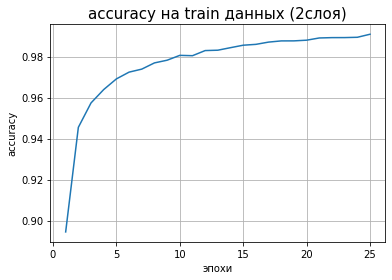

In [21]:
plt.plot(np.arange(1, 26), fit_data.history['accuracy'])
plt.title('accuracy на train данных (2слоя)', fontsize=15)
plt.ylabel('accuracy')
plt.xlabel('эпохи')
plt.grid(True)
plt.show()

### Профиль accuracy на тестовых данных (модель 2 скрытых слоя)

In [22]:
def draw_epoch_test_profile(ep_line, vr_l = 2):
    # ep_line = [3, 5, 7, 9, 11, 13, 15] #]
    m_acc = []
    
    for ep in ep_line:
        print(f"Количество эпох при обучении: {ep}")
        m_acc.append(build_eval_nn(ep_n = ep, vr = vr_l)[1])
    
    plt.plot(ep_line, m_acc, 'ob')
    plt.title('accuracy на тестовых данных', fontsize=15)
    plt.ylabel('accuracy')
    plt.xlabel('Количество эпох при обучении')
    plt.grid(True)
    plt.show()

Количество эпох при обучении: 3
Epoch 1/3
 - 10s - loss: 0.3608 - accuracy: 0.8911
Epoch 2/3
 - 10s - loss: 0.1798 - accuracy: 0.9459
Epoch 3/3
 - 12s - loss: 0.1425 - accuracy: 0.9560
Количество эпох при обучении: 5
Epoch 1/5
 - 11s - loss: 0.3630 - accuracy: 0.8916
Epoch 2/5
 - 10s - loss: 0.1925 - accuracy: 0.9420
Epoch 3/5
 - 9s - loss: 0.1474 - accuracy: 0.9546
Epoch 4/5
 - 9s - loss: 0.1233 - accuracy: 0.9615
Epoch 5/5
 - 9s - loss: 0.1068 - accuracy: 0.9671
Количество эпох при обучении: 7
Epoch 1/7
 - 10s - loss: 0.3744 - accuracy: 0.8899
Epoch 2/7
 - 10s - loss: 0.1966 - accuracy: 0.9413
Epoch 3/7
 - 10s - loss: 0.1554 - accuracy: 0.9528
Epoch 4/7
 - 9s - loss: 0.1300 - accuracy: 0.9603
Epoch 5/7
 - 10s - loss: 0.1114 - accuracy: 0.9661
Epoch 6/7
 - 10s - loss: 0.1012 - accuracy: 0.9689
Epoch 7/7
 - 12s - loss: 0.0904 - accuracy: 0.9714
Количество эпох при обучении: 9
Epoch 1/9
 - 10s - loss: 0.3639 - accuracy: 0.8894
Epoch 2/9
 - 9s - loss: 0.1860 - accuracy: 0.9427
Epoch 3/9


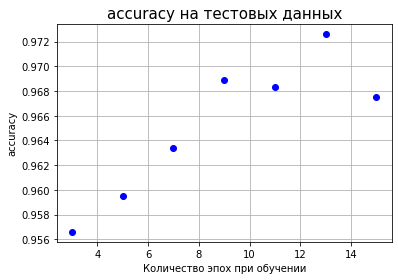

In [23]:
draw_epoch_test_profile(np.arange(3, 16, 2))

### Профиль loss и accuracy на train данных (модель 3 скрытых слоя)

In [24]:
model_loss, model_accuracy, fit_data = build_eval_nn(ep_n = 25, add_layer = True)

Epoch 1/25
60000/60000 [==============================] - 13s 212us/step - loss: 0.3522 - accuracy: 0.8913
Epoch 2/25
60000/60000 [==============================] - 13s 220us/step - loss: 0.1757 - accuracy: 0.9465
Epoch 3/25
60000/60000 [==============================] - 12s 202us/step - loss: 0.1381 - accuracy: 0.9580
Epoch 4/25
60000/60000 [==============================] - 13s 210us/step - loss: 0.1152 - accuracy: 0.9643
Epoch 5/25
60000/60000 [==============================] - 12s 206us/step - loss: 0.1000 - accuracy: 0.9695
Epoch 6/25
60000/60000 [==============================] - 12s 199us/step - loss: 0.0907 - accuracy: 0.9715
Epoch 7/25
60000/60000 [==============================] - 12s 201us/step - loss: 0.0810 - accuracy: 0.9736
Epoch 8/25
60000/60000 [==============================] - 13s 215us/step - loss: 0.0761 - accuracy: 0.9753
Epoch 9/25
60000/60000 [==============================] - 16s 260us/step - loss: 0.0699 - accuracy: 0.9772
Epoch 10/25
60000/60000 [============

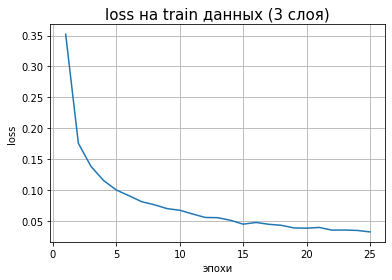

In [25]:
plt.plot(np.arange(1, 26), fit_data.history['loss'])
plt.title('loss на train данных (3 слоя)', fontsize=15)
plt.ylabel('loss')
plt.xlabel('эпохи')
plt.grid(True)
plt.show()

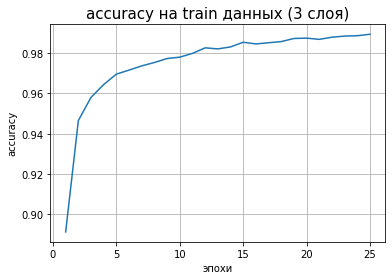

In [26]:
plt.plot(np.arange(1, 26), fit_data.history['accuracy'])
plt.title('accuracy на train данных (3 слоя)', fontsize=15)
plt.ylabel('accuracy')
plt.xlabel('эпохи')
plt.grid(True)
plt.show()

### grid search

In [27]:
def grid_search(batch_size, n_num, add_l = False, ep = 5, vr = 0):
    b_acc = b_b_s = b_n_n = 0

    for b_s in batch_size:
        for n_n in n_num:
            print(f"Модель - эпох: {ep}, batch_size: {b_s}, нейронов в слое: {n_n}")
            model_loss, model_accuracy, fit_data = build_eval_nn(ep_n = ep, 
                                                                 b_s = b_s, 
                                                                 n_num = n_n,
                                                                 add_layer = add_l,
                                                                 vr = 0)
            print(f"\t model_loss: {model_loss:.4f}, model_accuracy: {model_accuracy:.4f}")
            if b_acc < model_accuracy:
                b_acc = model_accuracy
                b_b_s = b_s
                b_n_n = n_n
    
    print(f"\nЛучший показатель accuracy на тестовых данных: {b_acc}")
    print(f"\tПараметры модели - batch_size: {b_b_s}, нейронов в слое: {b_n_n}")

In [28]:
batch_size = [24, 32, 48]
n_num = [56, 64, 78]
#add_layer = [False, True]

grid_search(batch_size, n_num)

Модель - эпох: 5, batch_size: 24, нейронов в слое: 56
	 model_loss: 0.1331, model_accuracy: 0.9568
Модель - эпох: 5, batch_size: 24, нейронов в слое: 64
	 model_loss: 0.1191, model_accuracy: 0.9616
Модель - эпох: 5, batch_size: 24, нейронов в слое: 78
	 model_loss: 0.1137, model_accuracy: 0.9649
Модель - эпох: 5, batch_size: 32, нейронов в слое: 56
	 model_loss: 0.1217, model_accuracy: 0.9628
Модель - эпох: 5, batch_size: 32, нейронов в слое: 64
	 model_loss: 0.1099, model_accuracy: 0.9654
Модель - эпох: 5, batch_size: 32, нейронов в слое: 78
	 model_loss: 0.1099, model_accuracy: 0.9666
Модель - эпох: 5, batch_size: 48, нейронов в слое: 56
	 model_loss: 0.1310, model_accuracy: 0.9585
Модель - эпох: 5, batch_size: 48, нейронов в слое: 64
	 model_loss: 0.1163, model_accuracy: 0.9622
Модель - эпох: 5, batch_size: 48, нейронов в слое: 78
	 model_loss: 0.1072, model_accuracy: 0.9656

Лучший показатель accuracy на тестовых данных: 0.9666000008583069
	Параметры модели - batch_size: 32, нейрон

__Драматического влияния изменения архитектуры на оценку не выявлено. Оставляем исходную архитектуру и увеличиваем (до 25) количество эпох__